In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots

import sklearn
import datetime
from sklearn import metrics

In [2]:
df=pd.read_csv('metadata_updated.csv', parse_dates=True, index_col=0)

In [3]:
df.head()

,pratilipi_id,category_name,reading_time,updated_at,published_at,updated_at_date,updated_at_time,published_at_date,published_at_time
author_id,,,,,,,,,
-3.420000e+15,1.030000e+15,translation,0,19-08-2020 15.26,30-09-2016 10.37,19-08-2020,15.26,30-09-2016,10.37
-2.270000e+15,1.380000e+15,translation,171,21-01-2021 16.27,11-06-2018 13.17,21-01-2021,16.27,11-06-2018,13.17
-2.270000e+15,1.380000e+15,translation,92,29-09-2020 12.33,12-06-2018 4.19,29-09-2020,12.33,12-06-2018,4.19
-2.270000e+15,1.380000e+15,translation,0,17-10-2019 9.03,26-09-2019 14.58,17-10-2019,9.03,26-09-2019,14.58
-2.270000e+15,1.380000e+15,translation,47,05-05-2020 11.33,25-11-2018 12.28,05-05-2020,11.33,25-11-2018,12.28


removing author id column as index

In [4]:
df = df.reset_index(level=0)
df

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at,updated_at_date,updated_at_time,published_at_date,published_at_time
0,-3.420000e+15,1.030000e+15,translation,0,19-08-2020 15.26,30-09-2016 10.37,19-08-2020,15.26,30-09-2016,10.37
1,-2.270000e+15,1.380000e+15,translation,171,21-01-2021 16.27,11-06-2018 13.17,21-01-2021,16.27,11-06-2018,13.17
2,-2.270000e+15,1.380000e+15,translation,92,29-09-2020 12.33,12-06-2018 4.19,29-09-2020,12.33,12-06-2018,4.19
3,-2.270000e+15,1.380000e+15,translation,0,17-10-2019 9.03,26-09-2019 14.58,17-10-2019,9.03,26-09-2019,14.58
4,-2.270000e+15,1.380000e+15,translation,47,05-05-2020 11.33,25-11-2018 12.28,05-05-2020,11.33,25-11-2018,12.28
...,...,...,...,...,...,...,...,...,...,...
954496,-2.270000e+15,1.380000e+15,Horror-Marathon,304,22-03-2022 17.40,22-03-2022 17.40,22-03-2022,17.40,22-03-2022,17.40
954497,-2.270000e+15,1.380000e+15,Horror-Marathon,588,22-03-2022 11.44,22-03-2022 11.44,22-03-2022,11.44,22-03-2022,11.44
954498,-2.270000e+15,1.380000e+15,Horror-Marathon,359,22-03-2022 12.39,22-03-2022 12.38,22-03-2022,12.39,22-03-2022,12.38
954499,-2.270000e+15,1.380000e+15,Horror-Marathon,310,23-03-2022 15.55,23-03-2022 15.55,23-03-2022,15.55,23-03-2022,15.55


In [5]:
df.columns
#displaying all column names

Index(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at', 'published_at', 'updated_at_date', 'updated_at_time',
       'published_at_date', 'published_at_time'],
      dtype='object')

In [6]:
df.shape

(954501, 10)

In [7]:
df.dtypes

author_id            float64
pratilipi_id         float64
category_name         object
reading_time           int64
updated_at            object
published_at          object
updated_at_date       object
updated_at_time      float64
published_at_date     object
published_at_time    float64
dtype: object

In [8]:
df.describe()
#statistcial values of numeric columns

,author_id,pratilipi_id,reading_time,updated_at_time,published_at_time
count,9.545010e+05,9.545010e+05,954501.000000,954501.000000,954494.000000
mean,-2.379289e+15,1.370767e+15,351.979334,10.989287,11.249166
std,3.922847e+14,1.162846e+14,513.959547,5.494473,5.459552
min,-9.070000e+15,-8.730000e+14,0.000000,0.000000,0.000000
25%,-2.270000e+15,1.380000e+15,111.000000,6.500000,7.060000
50%,-2.270000e+15,1.380000e+15,256.000000,11.090000,11.330000
75%,-2.270000e+15,1.380000e+15,461.000000,15.480000,16.040000
max,-2.270000e+15,1.380000e+15,78983.000000,23.590000,23.590000


Checking and removing null values

In [9]:
df=df.dropna(axis=0)

In [10]:
df.isna().sum()

author_id            0
pratilipi_id         0
category_name        0
reading_time         0
updated_at           0
published_at         0
updated_at_date      0
updated_at_time      0
published_at_date    0
published_at_time    0
dtype: int64

converting data columns from object to float dataype for sorting

In [11]:
df['updated_at_time']=df['updated_at_time'].astype(float)
df['published_at_time']=df['published_at_time'].astype(float)

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df['updated_at_time'].dtype

dtype('float64')

In [13]:
df=df.sort_values(by='updated_at_time',ascending=True)
df

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at,updated_at_date,updated_at_time,published_at_date,published_at_time
359502,-2.270000e+15,1.380000e+15,romance,289,27-12-2020 0.00,27-12-2020 0.00,27-12-2020,0.00,27-12-2020,0.00
383488,-2.270000e+15,1.380000e+15,romance,313,08-05-2021 0.00,08-05-2021 0.00,08-05-2021,0.00,08-05-2021,0.00
467197,-2.270000e+15,1.380000e+15,romance,6,14-03-2022 0.00,14-03-2022 0.00,14-03-2022,0.00,14-03-2022,0.00
266381,-2.270000e+15,1.380000e+15,Pratilipi-kalamkar-samman,170,26-06-2021 0.00,26-06-2021 0.00,26-06-2021,0.00,26-06-2021,0.00
467194,-2.270000e+15,1.380000e+15,romance,4,14-03-2022 0.00,14-03-2022 0.00,14-03-2022,0.00,14-03-2022,0.00
...,...,...,...,...,...,...,...,...,...,...
807376,-2.270000e+15,1.380000e+15,social,882,23-01-2020 23.59,23-01-2020 23.59,23-01-2020,23.59,23-01-2020,23.59
676555,-2.270000e+15,1.380000e+15,webseries,239,17-07-2020 23.59,17-07-2020 22.15,17-07-2020,23.59,17-07-2020,22.15
443134,-2.270000e+15,1.380000e+15,romance,57,23-12-2021 23.59,23-12-2021 23.59,23-12-2021,23.59,23-12-2021,23.59
934757,-2.270000e+15,1.380000e+15,horror,203,18-11-2020 23.59,18-11-2020 23.59,18-11-2020,23.59,18-11-2020,23.59


In [14]:
df = df.reset_index(level=0)

removing date columns as it contains many unique values 

In [15]:
df=df.drop(['updated_at','published_at'], axis=1)

In [16]:
df.head(2)

,index,author_id,pratilipi_id,category_name,reading_time,updated_at_date,updated_at_time,published_at_date,published_at_time
0,359502,-2.270000e+15,1.380000e+15,romance,289,27-12-2020,0.0,27-12-2020,0.0
1,383488,-2.270000e+15,1.380000e+15,romance,313,08-05-2021,0.0,08-05-2021,0.0


In [17]:
df['updated_at_date'] = pd.to_datetime(df["updated_at_date"])
df['published_at_date'] = pd.to_datetime(df["published_at_date"])

In [18]:
date_range = str(df['published_at_date'].dt.date.min()) + ' to ' +str(df['published_at_date'].dt.date.max())
date_range

'2014-02-11 to 2022-12-03'

In [19]:
df.dtypes

index                         int64
author_id                   float64
pratilipi_id                float64
category_name                object
reading_time                  int64
updated_at_date      datetime64[ns]
updated_at_time             float64
published_at_date    datetime64[ns]
published_at_time           float64
dtype: object

plotting correlation matrix

(6.5, -0.5)

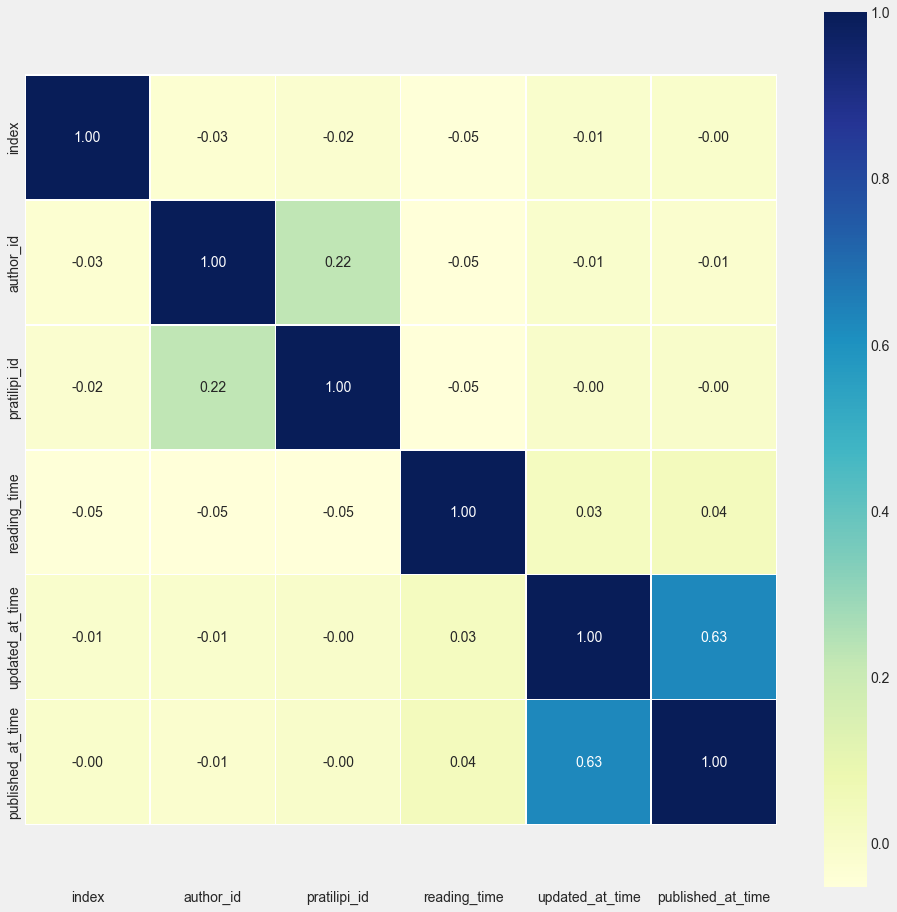

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
df.category_name.unique()
#for displaying unique category names

array(['romance', 'Pratilipi-kalamkar-samman', 'entertainment', 'novels',
       'women', 'moral-inspiring', 'family', 'murder-mystery', 'suspense',
       'shortstories', 'erotica', 'social', 'premkamahina',
       'experiences-and-memories', 'life', 'Indiawale',
       'relegion-and-spiritual', 'children', 'horror', 'crime-lekhan',
       'action-and-adventure', 'crime', 'detective',
       'Pratilipi-Awards-Hindi', 'webseries', 'mythology', 'drama',
       'Parytan', 'translation', 'short-story-challenge',
       'Horror-Marathon', 'fantasy', 'science-fiction', 'swahindi2',
       'pratilipi-kids', 'Serieswriting', 'politics', 'comedy',
       'pravasi-sahitya', 'Rashtriya', 'health-and-wellness',
       'The-Chat-Story', 'krishi-jeevan', 'Radio-Fiction',
       'cyber-crime-fiction'], dtype=object)

In [22]:
df.category_name.nunique()

45

Displaying and plotting cataegory counts to check data imbalance

In [23]:
df.category_name.value_counts()

romance                      193218
shortstories                 102096
social                        73919
suspense                      64041
family                        58515
novels                        53584
life                          51356
moral-inspiring               47421
women                         37167
horror                        28506
entertainment                 23362
action-and-adventure          21589
experiences-and-memories      20275
webseries                     16227
relegion-and-spiritual        15476
comedy                        14893
Pratilipi-kalamkar-samman     13237
mythology                     12323
children                      10196
Indiawale                      9674
Pratilipi-Awards-Hindi         9342
fantasy                        9324
swahindi2                      7853
drama                          7387
crime                          7151
politics                       5810
translation                    4250
short-story-challenge       

<AxesSubplot:>

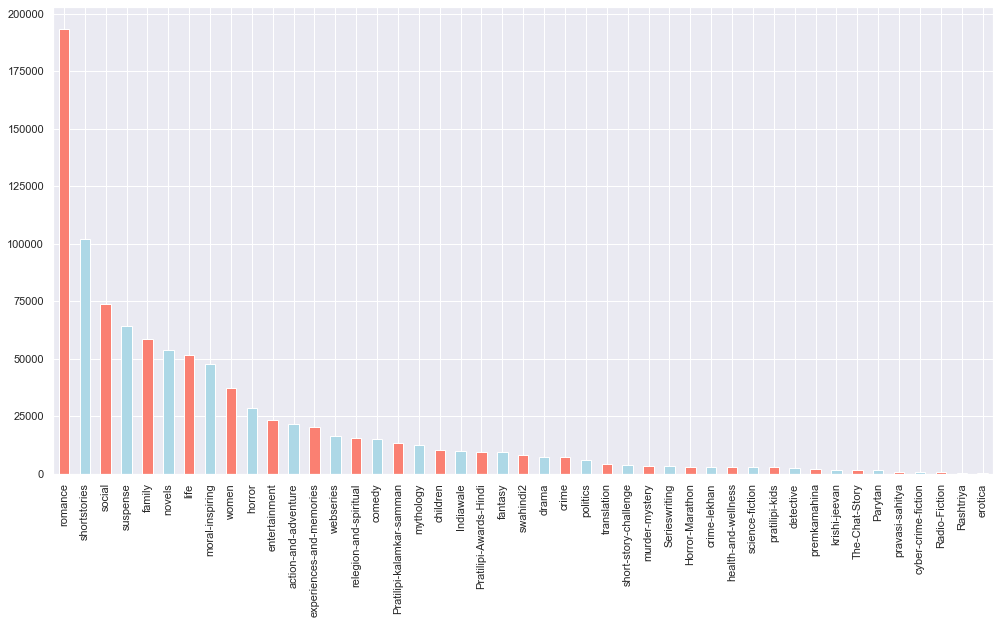

In [24]:
sns.set(rc = {'figure.figsize':(15,8)})
df.category_name.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

The provided data ih highly imbalanced. This would create bais againts majority classes like romance and shortstories 

D:\Anaconda\envs\test_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 4000.0)

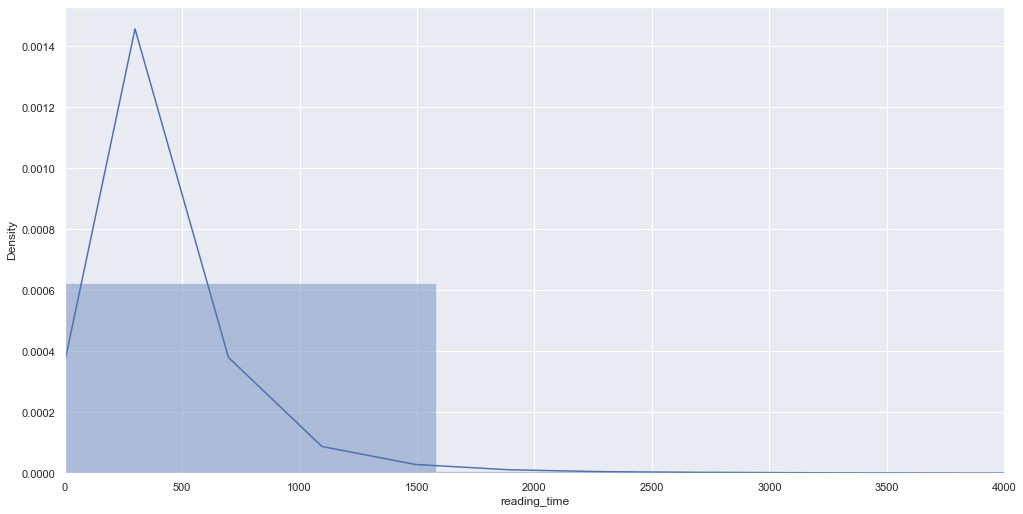

In [25]:
sns.distplot(df.reading_time)
plt.xlim(0,4000)
#plotting distribution plot to check whether the reading_time column has a normal distribution

In [26]:
df.skew(axis = 0, skipna = True)
#checking skew values for numeric columns

#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 

index                 0.000001
author_id            -3.807791
pratilipi_id        -14.069535
reading_time         32.821521
updated_at_time      -0.016408
published_at_time    -0.085543
dtype: float64

shows the distribution of reading_time values are highly skewed

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
Scaler=StandardScaler()
reading_time_scaled=Scaler.fit_transform(df[['reading_time']])
#attempt at removing skewness using standrad deviation

D:\Anaconda\envs\test_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

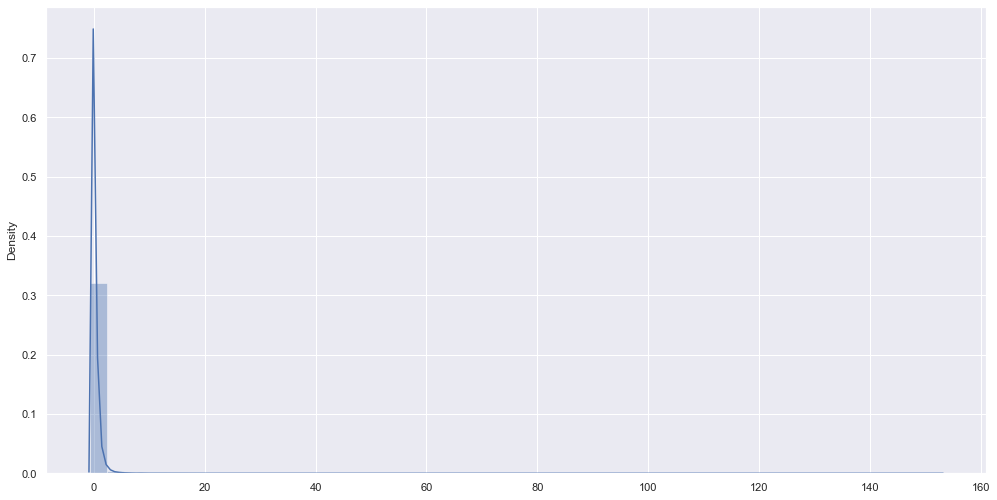

In [29]:
sns.distplot(reading_time_scaled)

It can be seen apply standardization is not rectifying the skewness 

In [30]:
#df.reading_time=np.log(df.reading_time)

In [31]:
#df['updated_at'] = pd.to_datetime(df['updated_at'],dayfirst=True)

Ckecking for outliers using boxplot

<AxesSubplot:>

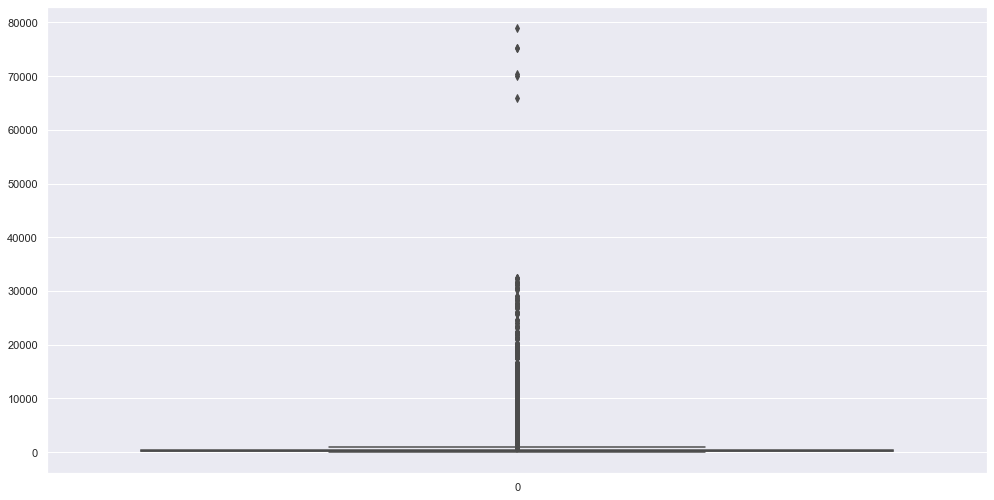

In [32]:
sns.boxplot(data=df.reading_time)

In [33]:
df.reading_time1=np.log(df.reading_time)

D:\Anaconda\envs\test_gpu\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

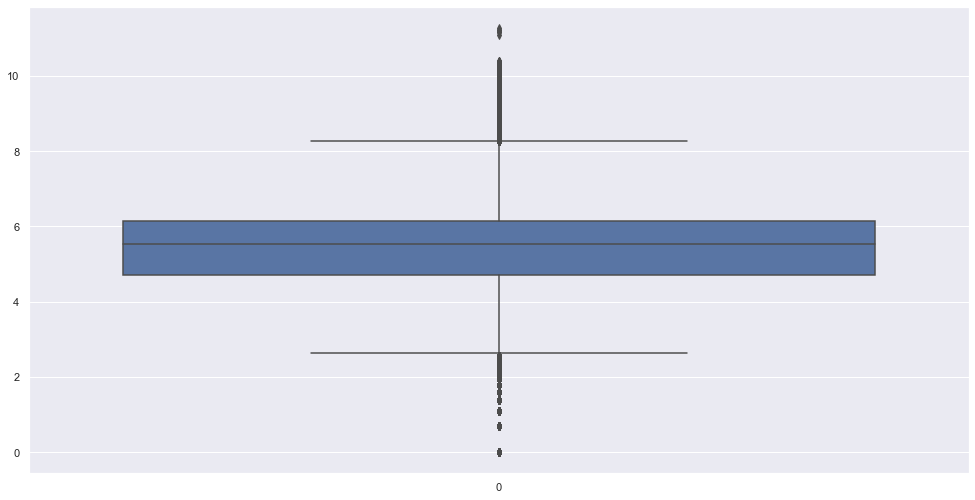

In [34]:
sns.boxplot(data=df.reading_time1)

In [35]:
df.columns

Index(['index', 'author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at_date', 'updated_at_time', 'published_at_date',
       'published_at_time'],
      dtype='object')

In [36]:
df.dtypes

index                         int64
author_id                   float64
pratilipi_id                float64
category_name                object
reading_time                  int64
updated_at_date      datetime64[ns]
updated_at_time             float64
published_at_date    datetime64[ns]
published_at_time           float64
dtype: object

assigning input and output variables

In [37]:
X=df.drop(['category_name','index'], axis=1)
y=df[['category_name']]

In [38]:
X

,author_id,pratilipi_id,reading_time,updated_at_date,updated_at_time,published_at_date,published_at_time
0,-2.270000e+15,1.380000e+15,289,2020-12-27,0.00,2020-12-27,0.00
1,-2.270000e+15,1.380000e+15,313,2021-08-05,0.00,2021-08-05,0.00
2,-2.270000e+15,1.380000e+15,6,2022-03-14,0.00,2022-03-14,0.00
3,-2.270000e+15,1.380000e+15,170,2021-06-26,0.00,2021-06-26,0.00
4,-2.270000e+15,1.380000e+15,4,2022-03-14,0.00,2022-03-14,0.00
...,...,...,...,...,...,...,...
954489,-2.270000e+15,1.380000e+15,882,2020-01-23,23.59,2020-01-23,23.59
954490,-2.270000e+15,1.380000e+15,239,2020-07-17,23.59,2020-07-17,22.15
954491,-2.270000e+15,1.380000e+15,57,2021-12-23,23.59,2021-12-23,23.59
954492,-2.270000e+15,1.380000e+15,203,2020-11-18,23.59,2020-11-18,23.59


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [40]:
y=le.fit_transform(y)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
y=pd.Series(y)

<AxesSubplot:title={'center':'Correlation with target'}>

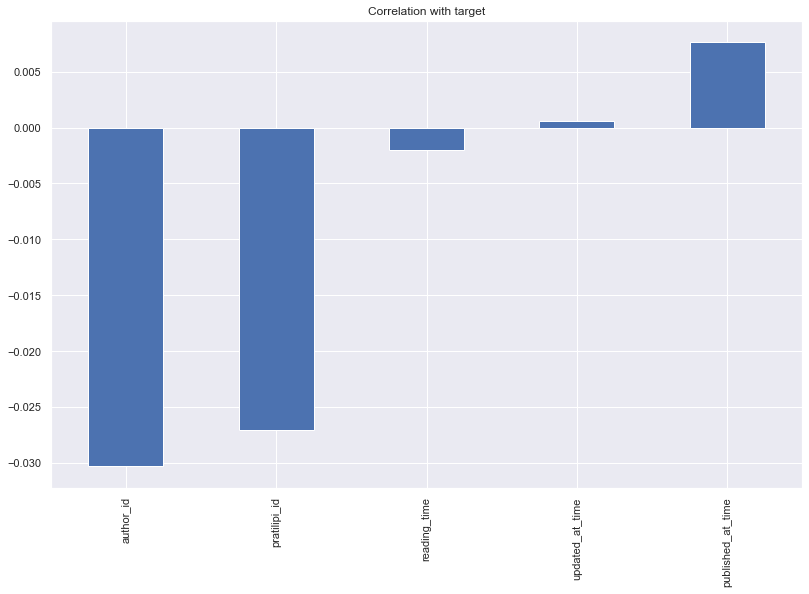

In [42]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [43]:
X=X.drop(['updated_at_date','published_at_date'], axis=1)

In [44]:
y.unique()

array([35,  4, 17, 29, 44, 26, 20, 27, 40, 38, 18, 39, 33, 19, 25,  1, 34,
       10, 23, 13,  9, 12, 15,  3, 43, 28, 16,  2, 42, 37,  0, 21, 36, 41,
       31,  7, 30, 11, 32,  6, 22,  8, 24,  5, 14])

In [45]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

Solving data imbalancing using Synthetic Minortiy Oversampling Technique

In [46]:
#sns.set(rc = {'figure.figsize':(15,8)})
#y.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [47]:
X_names=X.columns
y_names=df.category_name.unique()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [49]:
X_train.shape

(715870, 5)

In [50]:
y_train.shape

(715870,)

# Model 1: Random forest Classifier

In [117]:
#from sklearn.tree import DecisionTreeClassifier
#model=DecisionTreeClassifier()

In [51]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()

In [53]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint

# displaying parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Defining limits for hyperparameters

In [54]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest

max_features = ['auto', 'sqrt'] # Number of features to consider at every split

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)

min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node

min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node

bootstrap = [True, False] # Method of selecting samples for training each tree

# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [57]:
# Using the random grid to search for best hyperparameters

rf = RandomForestClassifier()  #base model

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.22100381        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
#making a new model with the best parameters possible 

In [66]:
model = RandomForestClassifier(n_estimators=400,
 min_samples_split=2,
 min_samples_leaf=4,
 max_features='sqrt',
 max_depth=10,
 bootstrap=True)

In [67]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400)

In [68]:
model.score(X_train,y_train)

0.22428792937265146

In [69]:
model.score(X_test,y_test)

0.2214823320370122

In [70]:
y_pred=model.predict(X_test)

### other evaluation matrices : Precision, Recall, F1-Score, Support 

Support is the number of actual occurrences of the class in the specified dataset.

In [71]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       731
           1       0.00      0.00      0.00      2414
           2       0.00      0.00      0.00       351
           3       0.00      0.00      0.00      2416
           4       0.00      0.00      0.00      3326
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       102
           7       0.00      0.00      0.00       774
           8       0.00      0.00      0.00       422
           9       0.00      0.00      0.00      5434
          10       1.00      0.00      0.00      2576
          11       0.33      0.00      0.00      3676
          12       0.00      0.00      0.00      1754
          13       0.00      0.00      0.00       764
          14       0.00      0.00      0.00       128
          15       0.00      0.00      0.00       491
          16       0.00      0.00      0.00      1818
          17       0.20    

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Displaying Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [73]:
#for vizualizing the branchin of decision tree
"""
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_names,  
                   class_names=y_names,
                   filled=True)
"""

'\nfrom sklearn import tree\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(model, \n                   feature_names=X_names,  \n                   class_names=y_names,\n                   filled=True)\n'

Testing the recommendation model for an input example

In [74]:
X.loc[[2265]]

,author_id,pratilipi_id,reading_time,updated_at_time,published_at_time
2265,-2.270000e+15,1.380000e+15,810,0.09,0.09


Displaying probabilty scores of different pratilip categories

In [75]:
model.predict_proba(X.loc[[2256]])

array([[1.74801946e-03, 1.24871157e-02, 1.12808807e-03, 4.11125816e-03,
        7.20456420e-03, 3.55257599e-04, 4.47337639e-04, 3.44631003e-03,
        9.18726786e-04, 1.26590804e-02, 1.52049447e-02, 2.05631615e-02,
        8.73191844e-03, 2.25696453e-03, 2.89810635e-04, 3.46063117e-03,
        6.35116150e-03, 1.23013117e-02, 7.97711485e-05, 4.95346527e-02,
        9.31806882e-02, 8.56909598e-03, 4.58305269e-03, 2.70102960e-02,
        1.07950896e-03, 3.65783163e-02, 7.82211816e-02, 2.18724028e-03,
        1.33242110e-02, 3.07838073e-02, 6.35471258e-03, 1.27243439e-03,
        2.16877373e-04, 1.23044955e-03, 7.84747077e-03, 1.42241137e-01,
        1.80420308e-03, 1.25596130e-03, 1.25467346e-01, 1.23412857e-01,
        4.24193566e-02, 6.25760828e-03, 2.15151436e-03, 1.02501984e-02,
        6.90203895e-02]])

In [76]:
result=model.predict_proba(X.loc[[2256]])

In [77]:
result=np.array(result)

In [78]:
# Import the matplotlib library
import matplotlib.pyplot as plt

# Save the one-size array into variable
pred_prob = result[0]

# Class names from the predictions
class_names = ['romance', 'Pratilipi-kalamkar-samman', 'entertainment', 'novels',
       'women', 'moral-inspiring', 'family', 'murder-mystery', 'suspense',
       'shortstories', 'erotica', 'social', 'premkamahina',
       'experiences-and-memories', 'life', 'Indiawale',
       'relegion-and-spiritual', 'children', 'horror', 'crime-lekhan',
       'action-and-adventure', 'crime', 'detective',
       'Pratilipi-Awards-Hindi', 'webseries', 'mythology', 'drama',
       'Parytan', 'translation', 'short-story-challenge',
       'Horror-Marathon', 'fantasy', 'science-fiction', 'swahindi2',
       'pratilipi-kids', 'Serieswriting', 'politics', 'comedy',
       'pravasi-sahitya', 'Rashtriya', 'health-and-wellness',
       'The-Chat-Story', 'krishi-jeevan', 'Radio-Fiction',
       'cyber-crime-fiction']
class_names=np.array(class_names)

### Recommendation of most appropriate pratilipi category according to input 

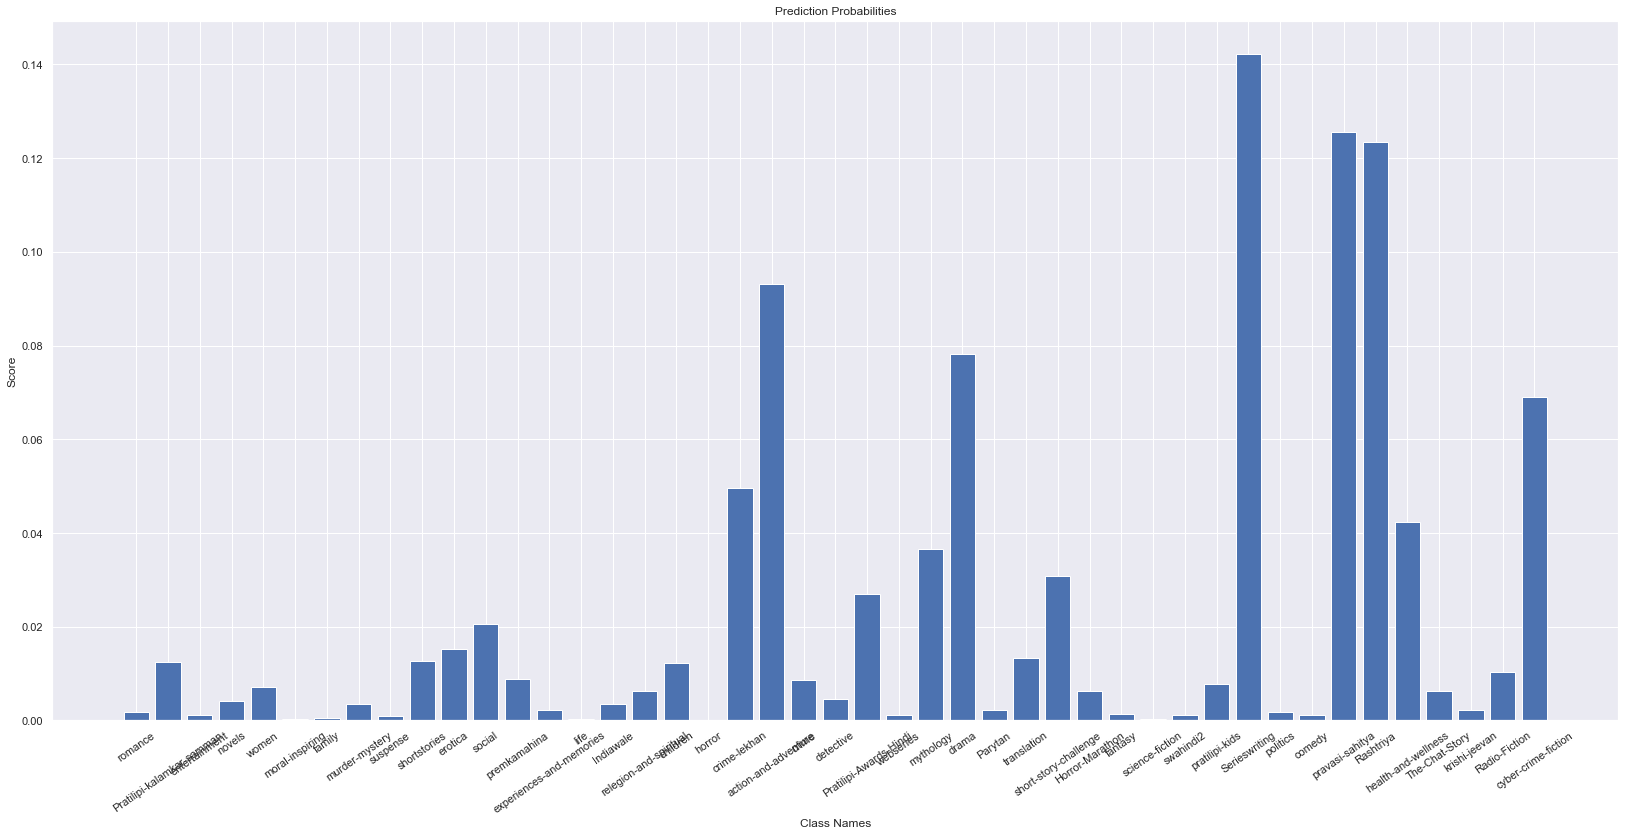

In [79]:
# Set the figure size
plt.figure(figsize=(25, 12))

# Declare the plot you want to create
plt.bar(class_names, pred_prob)

# Set the title of your plot
plt.title("Prediction Probabilities")

# Give label for x and y of your plot
plt.xlabel("Class Names")
plt.ylabel("Score")

# Rotate the label
plt.xticks(rotation="35")

# Display chart 
plt.show()

# Model 2 (knn)

In [51]:
#model2.fit(X_train, y_train)

In [52]:
from sklearn.neighbors import KNeighborsClassifier  
model2=KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [53]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
model2.score(X_train,y_train)

0.3230279240644251

In [55]:
model2.score(X_test,y_test)

0.080645702024943

In [58]:
model2.predict_proba(X.loc[[2256]])

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.2, 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2,
        0.2, 0. , 0. , 0. , 0. , 0. ]])

In [59]:
result=model2.predict_proba(X.loc[[2256]])
result=np.array(result)

In [60]:
pred_prob = result[0]

In [61]:
#model2.score(X_test, y_test)

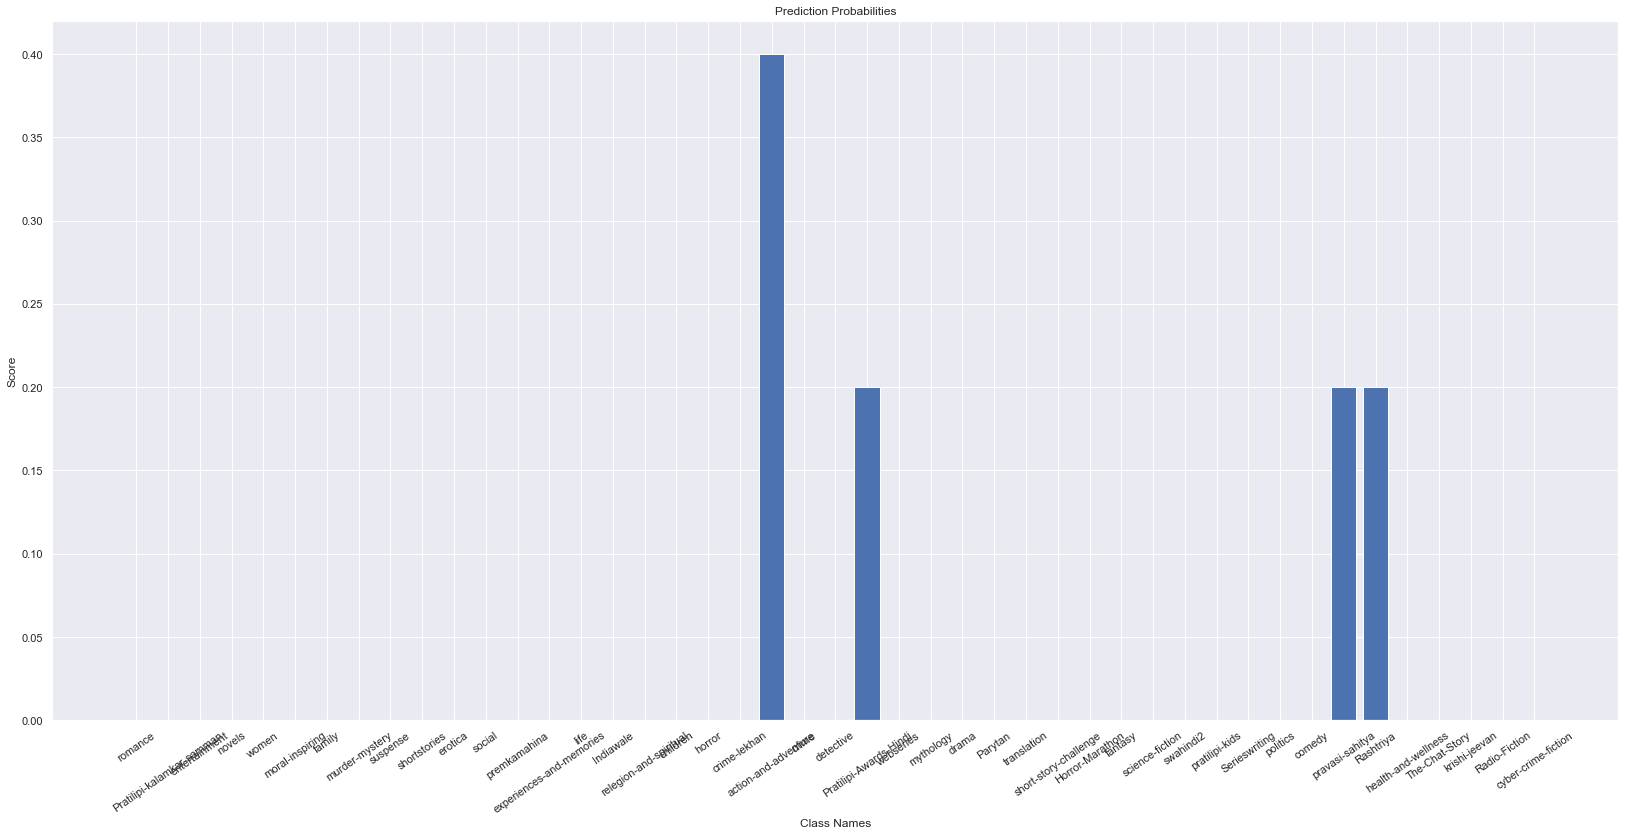

In [64]:
# Set the figure size
plt.figure(figsize=(25, 12))

# Declare the plot you want to create
plt.bar(class_names, pred_prob)

# Set the title of your plot
plt.title("Prediction Probabilities")

# Give label for x and y of your plot
plt.xlabel("Class Names")
plt.ylabel("Score")

# Rotate the label
plt.xticks(rotation="35")

# Display chart 
plt.show()

KNN is performing worse than Random Forest Classifier for recommending pratilipis

### Hyperparameter tuning using grid search CV 

In [ ]:
"""
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
a json file containing a list of all models and its parameter grid
"""

In [ ]:
""""
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_     #for putting these attribute values in different columns in a dataframe
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
""""